In [2]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

In [3]:
def init():
  M = rd.randint(0, 2, (2, 2))
  return(M)

def coup(M, l):
  for i in range(0,len(l),2):
    a = l[i]
    b = l[i+1]
    M[a][b] = 1 - M[a][b]

    
def rotate(M):
  n = rd.randint(0,4)
  for k in range(n):
    A = M.copy()
    M[0,0] = A[1,0]
    M[1,0] = A[1,1]
    M[1,1] = A[0,1]
    M[0,1] = A[0,0]

def win(M):
  a = M[0,0]
  bool = True
  for i in range(2):
    for j in range(2):
      if a != M[i,j]: 
        bool = False
  return(bool)

In [4]:
def jeu():
  M = init()
  while not win(M):
    ton_coup = input()
    jouons = [int(t) for t in ton_coup.split(",")]
    coup(M,jouons)
    rotate(M)
  print("bravo")
    


In [ ]:
jeu()

1,0
0,1
1,0,0,0
1,1,1,0
1,0,0,1
1,1,1,0
1,1
1,1,1,0
1,1,0,0
1,1,1,0


KeyboardInterrupt: ignored

In [5]:
def au_hasard():
  L = []
  for i in range(10000):
    M = init()
    k = 0
    while not win(M):
      a = rd.randint(1,3)
      jouons1 = rd.randint(0,2,2) #jouons = rd.randint(0,2,2*a) donne potentiellement un coup inutile par exemple on aurait pu avoir jouons = [0,1,0,1], d'où ces quelques lignes pour contourner ce problème, mais avec cette version on avait un résultat hasardeux qui convergeait vers 7 ce qui était intéréssant au vu de la solution théorique en 7 coups.
      if a == 1:
        coup(M,jouons1)
        rotate(M)
      else:
        jouons2 = rd.randint(0,2,2)
        while (jouons1 == jouons2).all():
          jouons2 = rd.randint(0,2,2)
        jouons = np.concatenate((jouons1,jouons2))
        coup(M,jouons)
        rotate(M)
      k += 1
    L.append(k)
  mean = sum(L)/len(L)
  return(mean)
au_hasard()

6.2158

On effectue le test unitaire sur la fonction win.

In [6]:
import unittest

class TestWin(unittest.TestCase):

  def test_win(self):
        resultat1 = win(np.array([[1,1],[1,1]]))
        resultat2 = win(np.array([[0,1],[1,0]]))
        self.assertTrue(resultat1)
        self.assertFalse(resultat2)

if __name__ == '__main__':
    unittest.main()

E
ERROR: /root/ (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/root/'

----------------------------------------------------------------------
Ran 1 test in 0.003s

FAILED (errors=1)


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
def strat_gagnante(M):
  l = [[0,0,1,1],[0,0,0,1],[0,0,1,1],[0,0],[0,0,1,1],[0,0,0,1],[0,0,1,1]] #on choisit arbitrairement une des stratégies cbcacbc
  k = 0
  while not win(M):
    coup(M,l[k])
    rotate(M)
    k += 1
  return(k)


def strat_hasard(M): #reprend le code de au_hasard
  k = 0
  while not win(M):
    a = rd.randint(1,3)
    jouons1 = rd.randint(0,2,2)
    if a == 1:
      coup(M,jouons1)
      rotate(M)
    else:
      jouons2 = rd.randint(0,2,2)
      while (jouons1 == jouons2).all():
        jouons2 = rd.randint(0,2,2)
      jouons = np.concatenate((jouons1,jouons2))
      coup(M,jouons)
      rotate(M)
    k += 1
  return(k)


def HasardContreStrat(): 
  M1 = init()
  M2 = init()
  i = strat_gagnante(M1)
  k = strat_hasard(M2)
  if k > i:
    return(1) #la stratégie l'emporte
  elif k < i: 
    return(2) #le hasard l'emporte
  else: 
    return(0) #match nul

def casino():
  l = [0,0]
  for i in range(10000):
    a = HasardContreStrat()
    if a == 1: 
      l[0] += 1
    else:
      l[1] += 1
  return(l)

def diagramme():
  names = ["Stratégie","Hasard"]
  values = casino()
  plt.bar(names, values)
  plt.ylabel('Nombre de victoires sur 10000 parties')
  plt.title('Diagramme montrant le nombre de victoire de la stratégie face au hasard')
  plt.show()
  return()

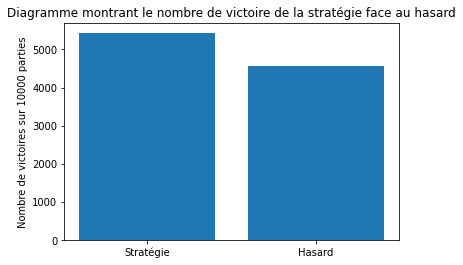

()

In [8]:
diagramme()

On s'occupe maintenant de la version du jeu avec des pièces à trois faces.

In [41]:
def init2():
  M = rd.randint(0, 3, (2, 2))
  return(M)

def coup2(M, l):
  for i in range(0,len(l),2):
    a = l[i]
    b = l[i+1]
    if M[a][b] == 2:
      M[a][b] = 0
    else:
      M[a][b] += 1

def jeu2():
  M = init2()
  while not win(M):
    ton_coup = input()
    jouons = [int(t) for t in ton_coup.split(",")]
    coup2(M,jouons)
    rotate(M)
  print("bravo")


In [ ]:
jeu2()

KeyboardInterrupt: ignored

In [10]:
def hasard2(): 
  L = []
  for i in range(10000):
    M = init2()
    k = 0
    while not win(M):
      a = rd.randint(1,3)
      jouons1 = rd.randint(0,2,2) 
      if a == 1:
        coup2(M,jouons1)
        rotate(M)
      else:
        jouons2 = rd.randint(0,2,2)
        while (jouons1 == jouons2).all():
          jouons2 = rd.randint(0,2,2)
        jouons = np.concatenate((jouons1,jouons2))
        coup2(M,jouons)
        rotate(M)
      k += 1
    L.append(k)
  mean = sum(L)/len(L)
  return(mean)
hasard2()

25.5291

In [ ]:
from itertools import combinations_with_replacement

In [11]:
def score(k):
  if k < 6:
    return(10)
  elif k < 11:
    return(9)
  elif k < 16:
    return(8)
  elif k < 21:
    return(7)
  elif k < 26:
    return(6)
  elif k < 31:
    return(6)
  elif k < 36:
    return(5)
  elif k < 41:
    return(4)
  elif k < 46:
    return(3)
  elif k < 51:
    return(2)
  else:
    return(1)

def eval(l):
  L = []
  for i in range(100):
    M = init2()
    k = 0
    while not win(M) and k < len(l):
      coup2(M,l[k])
      rotate(M)
      k += 1
    if k == len(l):
      L.append(0) #on aurait pu mettre return(0) si on voulait directement éliminer les stratégies qui ne marchent pas à tous les coups, cela dépend de comment on définit l'efficacité d'une stratégie
    else: 
      L.append(score(k))
  mean = sum(L)/len(L)
  return(mean)

def TrouverStrat(): 
  L = [[0,0], [0,1], [1,0], [1,1], [0,0,0,1], [0,0,1,0], [0,0,1,1], [0,1,1,0], [0,1,1,1], [1,0,1,1]]
  compt = 0
  strat = []
  for i in range(55):
    possibilite = combinations_with_replacement(L, i)
    for l in possibilite:
      if compt < eval(l):
        compt = eval(l)
        strat = l
    print(compt) #montre les étapes de 
  return((strat, compt)) 
      



In [ ]:
TrouverStrat()

0
0.7
0.9
1.4
2.1
3.2
2.1
3.95
4.42
3.71
3.89


Cette version naïve a une complexité bien trop élevée (de l'ordre du $10^n$ avec ici n = 55 et puisque len(L) = 10), on va donc essayer d'implémenter quelque chose de récursif pour se ramener à une complexité qui n'est plus exponentielle.

In [58]:
def position_min(L):
  pos = 0
  res = L[0]
  for i in range(len(L)):
    if L[i] < res:
      pos = i
      res = L[i]
  return(pos)

def strat_i(n,i):
  L = [[0,0], [0,1], [1,0], [1,1], [0,0,0,1], [0,0,1,0], [0,0,1,1], [0,1,1,0], [0,1,1,1], [1,0,1,1]]
  if n == 1:
    return([L[i]])
  else:
    strat = strat_i(n-1,i)
    comp = []
    for l in L:
      l = [l]
      newstrat = strat + l
      res = []
      for i in range(1000):
        M = init2()
        k = 0
        for etape in newstrat:
          coup2(M,etape)
          rotate(M)
          k += 1
          if win(M):
            res.append(k)
            break
        if not win(M):
          res.append(n)
      mean = sum(res)/len(res)
      comp.append(mean)
    k = position_min(comp)
    strat.append(L[k])
    return(strat)

def rec_strat(n):
  res = []
  for i in range(10):
    strat = strat_i(n,i)
    compt = []
    for j in range(1000):
      M = init2()
      k = 0
      for l in strat:
        coup2(M,l)
        rotate(M)
        k += 1
        if win(M):
          compt.append(k)
          break
      if not win(M):
        compt.append(n)
    mean = sum(compt)/len(compt)
    res.append(mean)
  pos = position_min(res)
  return(strat_i(n,pos), res[pos])

In [56]:
strat_i(20,0)

KeyboardInterrupt: ignored

In [61]:
rec_strat(30)

([[0, 0, 1, 0],
  [1, 0],
  [0, 0, 1, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 1, 1, 0],
  [0, 1],
  [0, 0],
  [0, 1, 1, 0],
  [1, 1],
  [0, 0, 0, 1],
  [1, 0],
  [0, 0, 1, 0],
  [0, 1],
  [0, 1, 1, 0],
  [0, 0, 1, 1],
  [0, 0, 0, 1],
  [1, 0, 1, 1],
  [0, 1],
  [0, 0, 1, 0],
  [0, 1, 1, 0],
  [0, 1, 1, 1],
  [1, 1],
  [0, 0, 1, 1],
  [0, 0],
  [1, 0],
  [1, 0, 1, 1],
  [1, 0],
  [1, 0, 1, 1],
  [0, 0, 1, 0]],
 17.38)

On choisit de majorer arbitrairement la longueur de la stratégie optimale par 30 car le hasard fait en moyenne gagner en 25 et qu'on aura à priori une meilleure stratégie que le hasard. On obtient une victoire en à peu près 17 coups en moyenne ce qui semble cohérent.

In [62]:
strat_opti = [[0, 0, 1, 0], #obtenu avec rec_strat(30)
  [1, 0],
  [0, 0, 1, 1],
  [0, 0, 0, 1],
  [0, 0, 0, 1],
  [0, 1, 1, 0],
  [0, 1],
  [0, 0],
  [0, 1, 1, 0],
  [1, 1],
  [0, 0, 0, 1],
  [1, 0],
  [0, 0, 1, 0],
  [0, 1],
  [0, 1, 1, 0],
  [0, 0, 1, 1],
  [0, 0, 0, 1],
  [1, 0, 1, 1],
  [0, 1],
  [0, 0, 1, 0],
  [0, 1, 1, 0],
  [0, 1, 1, 1],
  [1, 1],
  [0, 0, 1, 1],
  [0, 0],
  [1, 0],
  [1, 0, 1, 1],
  [1, 0],
  [1, 0, 1, 1],
  [0, 0, 1, 0]]

def strat_gagnante2(M):
  k = 0
  while not win(M):
    coup2(M,strat_opti[k])
    rotate(M)
    k += 1
  return(k)


def strat_hasard2(M): #reprend le code de au_hasard
  k = 0
  while not win(M):
    a = rd.randint(1,3)
    jouons1 = rd.randint(0,2,2)
    if a == 1:
      coup2(M,jouons1)
      rotate(M)
    else:
      jouons2 = rd.randint(0,2,2)
      while (jouons1 == jouons2).all():
        jouons2 = rd.randint(0,2,2)
      jouons = np.concatenate((jouons1,jouons2))
      coup2(M,jouons)
      rotate(M)
    k += 1
  return(k)


def HasardContreStrat2(): 
  M1 = init2()
  M2 = init2()
  i = strat_gagnante(M1)
  k = strat_hasard(M2)
  if k > i:
    return(1) #la stratégie l'emporte
  elif k < i: 
    return(2) #le hasard l'emporte
  else: 
    return(0) #match nul

def casino2():
  l = [0,0]
  for i in range(1000):
    a = HasardContreStrat()
    if a == 1: 
      l[0] += 1
    else:
      l[1] += 1
  return(l)

def diagramme2():
  names = ["Stratégie","Hasard"]
  values = casino2()
  plt.bar(names, values)
  plt.ylabel('Nombre de victoires sur 1000 parties')
  plt.title('Diagramme montrant le nombre de victoire de la stratégie face au hasard')
  plt.show()
  return()

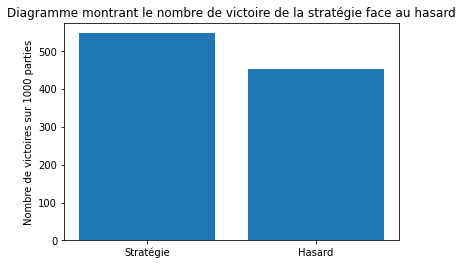

()

In [63]:
diagramme2()

On constate la même répartition de victoires entre la stratégie et le hasard que dans la première version du jeu. La stratégie ainsi obtenue est donc tout à fait satisfaisante et pourrait être utilisée pour jouer dans un casino.